# IMPORT

#### LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

#### DATASET

In [2]:
# Reading of Dataset and storing it into a DataFrame
data = pd.read_csv("application_train.csv")
data_t = pd.read_csv("application_test.csv")

# EXPLORATORY  DATA  ANALYSIS (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


##### DROPPING ID COLUMN

In [5]:
ID = data_t['SK_ID_CURR']

In [6]:
data.drop(['SK_ID_CURR'],axis= 1,inplace=True)
data_t.drop(['SK_ID_CURR'],axis= 1,inplace=True)

# VISUALISATION

In [7]:
data_1 = data[['DAYS_BIRTH','TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_CONTRACT_TYPE','AMT_GOODS_PRICE',
               'CODE_GENDER','NAME_EDUCATION_TYPE','OCCUPATION_TYPE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3',
               'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

#### AGE Distribution

In [8]:
ser = []
for i in range(data_1.shape[0]):
    if 0 < (-data_1['DAYS_BIRTH'][i]/365) <= 10:
        ser.append('0 to 10 years')
    if 10 < (-data_1['DAYS_BIRTH'][i]/365) <= 20:
        ser.append('10 to 20 years')
    if 20 < (-data_1['DAYS_BIRTH'][i]/365) <= 30:
        ser.append('20 to 30 years')
    if 30 < (-data_1['DAYS_BIRTH'][i]/365) <= 40:
        ser.append('30 to 40 years')
    if 40 < (-data_1['DAYS_BIRTH'][i]/365) <= 50:
        ser.append('40 to 50 years')    
    if 50 < (-data_1['DAYS_BIRTH'][i]/365) <= 60:
        ser.append('50 to 60 years')
    if 60 < (-data_1['DAYS_BIRTH'][i]/365) <= 70:
        ser.append('60 to 70 years')
    if 70 < (-data_1['DAYS_BIRTH'][i]/365) <= 80:
        ser.append('70 to 80 years')
    if 80 < (-data_1['DAYS_BIRTH'][i]/365) <= 90:
        ser.append('80 to 90 years')
    if 90 < (-data_1['DAYS_BIRTH'][i]/365) <= 100:
        ser.append('90 to 100 years')    
data_1['DAYS_BIRTH'] = ser 

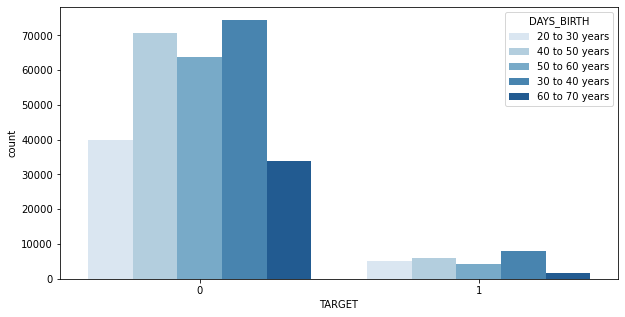

In [9]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'TARGET',hue = 'DAYS_BIRTH',data = data_1,palette = 'Blues')
plt.show()

In [10]:
d = data_1.copy()
#outlier removal
u = data_1['AMT_INCOME_TOTAL'].quantile(0.25) - 1.5*(data_1['AMT_INCOME_TOTAL'].quantile(0.25)-data_1['AMT_INCOME_TOTAL'].quantile(0.75))
l = data_1['AMT_INCOME_TOTAL'].quantile(0.75) + 1.5*(data_1['AMT_INCOME_TOTAL'].quantile(0.25)-data_1['AMT_INCOME_TOTAL'].quantile(0.75))

d = d[(l<d['AMT_INCOME_TOTAL'])&(d['AMT_INCOME_TOTAL']<u)]
d = d.reset_index()

In [11]:
ser_1 = []
for i in range(d.shape[0]):
    if 0 <(d['AMT_INCOME_TOTAL'][i])<= 25000:
        ser_1.append('0 to INR 25000 ')
    if 25000 < d['AMT_INCOME_TOTAL'][i] <= 50000:
        ser_1.append('25000 to INR 50000 ')
    if 50000 < d['AMT_INCOME_TOTAL'][i] <= 75000:
        ser_1.append('50000 to INR 75000 ')
    if 75000 < d['AMT_INCOME_TOTAL'][i] <= 100000:
        ser_1.append('75000 to INR 100000 ')
    if 100000 < d['AMT_INCOME_TOTAL'][i] <= 125000:
        ser_1.append('100000 to INR 125000 ')
    if 125000 < d['AMT_INCOME_TOTAL'][i] <= 150000:
        ser_1.append('125000 to INR 150000 ')
    if 150000 < d['AMT_INCOME_TOTAL'][i] <= 175000:
        ser_1.append('150000 to INR 175000 ')
    if 175000 < d['AMT_INCOME_TOTAL'][i] <= 200000:
        ser_1.append('175000 to INR 200000 ')
    if 200000 < d['AMT_INCOME_TOTAL'][i] <= 225000:
        ser_1.append('200000 to INR 225000 ')
    if 225000 < d['AMT_INCOME_TOTAL'][i] <= 250000:
        ser_1.append('225000 to INR 250000 ')
    
d['AMT_INCOME_TOTAL'] = ser_1 

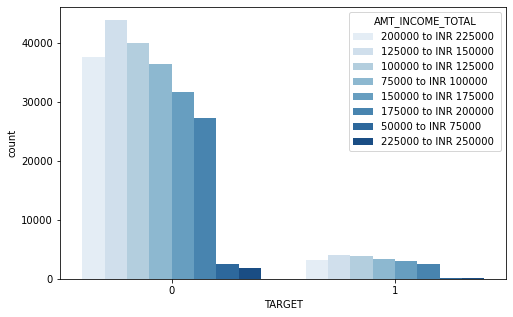

In [12]:
plt.figure(figsize = (8,5))
sns.countplot(x = d['TARGET'],hue =d['AMT_INCOME_TOTAL'],palette = 'Blues')
plt.show()

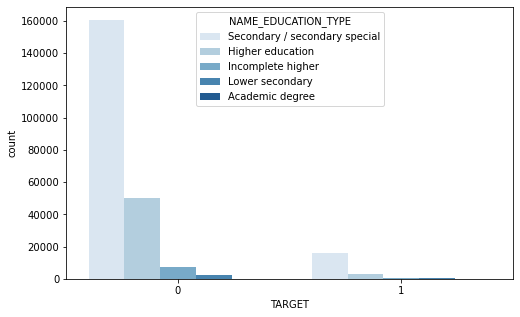

In [13]:
plt.figure(figsize = (8,5))
sns.countplot(x = d['TARGET'],hue =d['NAME_EDUCATION_TYPE'],palette = 'Blues')
plt.show()

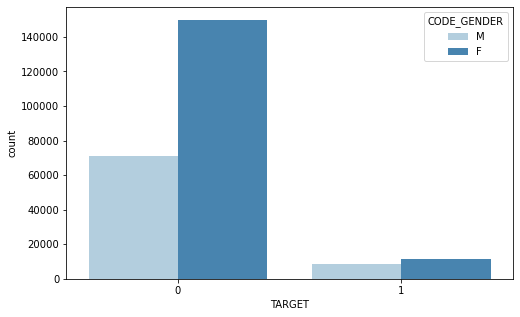

In [14]:
cg = d[d['CODE_GENDER'] != 'XNA']
plt.figure(figsize = (8,5))
sns.countplot(x = cg['TARGET'],hue =cg['CODE_GENDER'],palette = 'Blues')
plt.show()

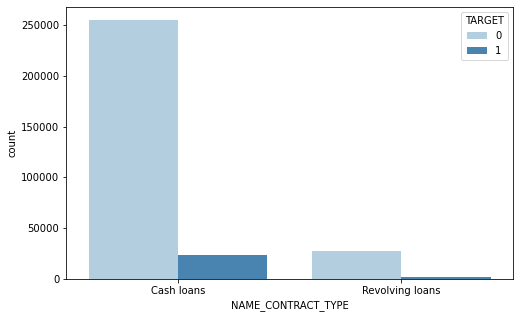

In [15]:
plt.figure(figsize = (8,5))
sns.countplot(x =data_1['NAME_CONTRACT_TYPE'],hue = data_1['TARGET'],palette = 'Blues')
plt.show()

In [16]:
d1 = d[d['TARGET'] == 1]
d0 = d[d['TARGET'] == 0]

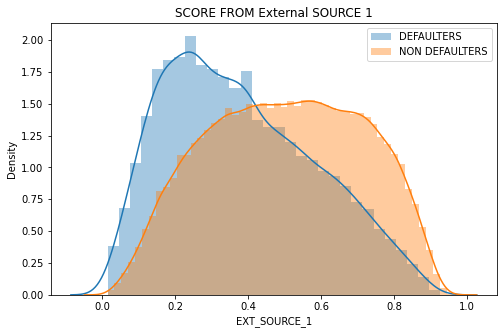

In [17]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
plt.subplot(1,1,1)
plt.title("SCORE FROM External SOURCE 1")
sns.distplot(d1['EXT_SOURCE_1'].dropna(),label = 'DEFAULTERS')
plt.subplot(1,1,1)
sns.distplot(d0['EXT_SOURCE_1'].dropna(),label = 'NON DEFAULTERS')
plt.legend()
plt.show()

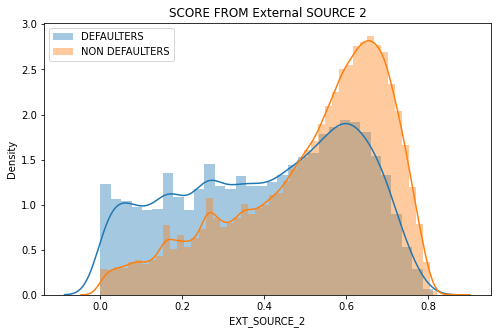

In [18]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
plt.subplot(1,1,1)
plt.title("SCORE FROM External SOURCE 2")
sns.distplot(d1['EXT_SOURCE_2'].dropna(),label = 'DEFAULTERS')
plt.subplot(1,1,1)
sns.distplot(d0['EXT_SOURCE_2'].dropna(),label = 'NON DEFAULTERS')
plt.legend()
plt.show()

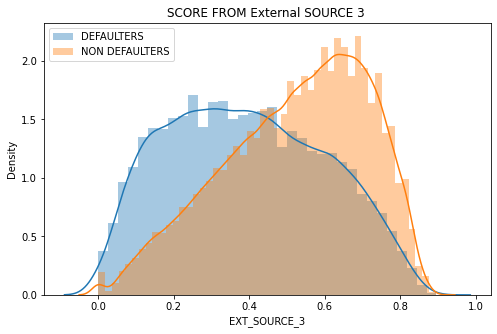

In [19]:
fig,axes = plt.subplots(1,1,figsize = (8,5))
plt.subplot(1,1,1)
plt.title("SCORE FROM External SOURCE 3 ")
sns.distplot(d1['EXT_SOURCE_3'].dropna(),label = 'DEFAULTERS')
plt.subplot(1,1,1)
sns.distplot(d0['EXT_SOURCE_3'].dropna(),label = 'NON DEFAULTERS')
plt.legend()
plt.show()

#### Pie Chart 

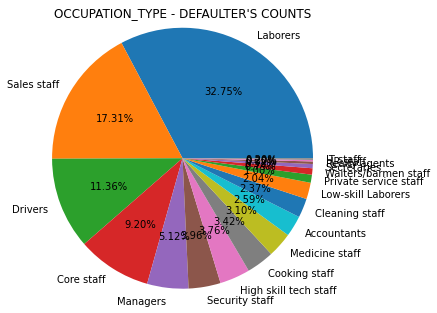

In [20]:
plt.figure(figsize = (10,5))
plt.title("OCCUPATION_TYPE - DEFAULTER'S COUNTS")
plt.pie(list(d1['OCCUPATION_TYPE'].value_counts()),labels = list(d1['OCCUPATION_TYPE'].value_counts().index),
        autopct = "%0.2f%%",radius = 1.2)
plt.show()

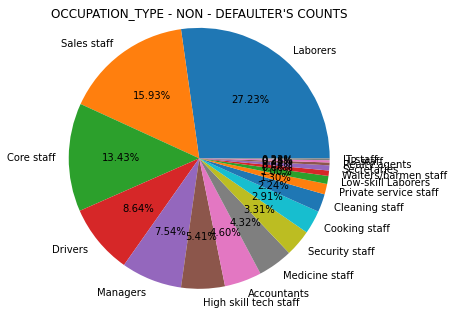

In [21]:
plt.figure(figsize = (10,5))
plt.title("OCCUPATION_TYPE - NON - DEFAULTER'S COUNTS")
plt.pie(list(d0['OCCUPATION_TYPE'].value_counts()),labels = list(d0['OCCUPATION_TYPE'].value_counts().index),
        autopct = "%0.2f%%",radius = 1.2)
plt.show()

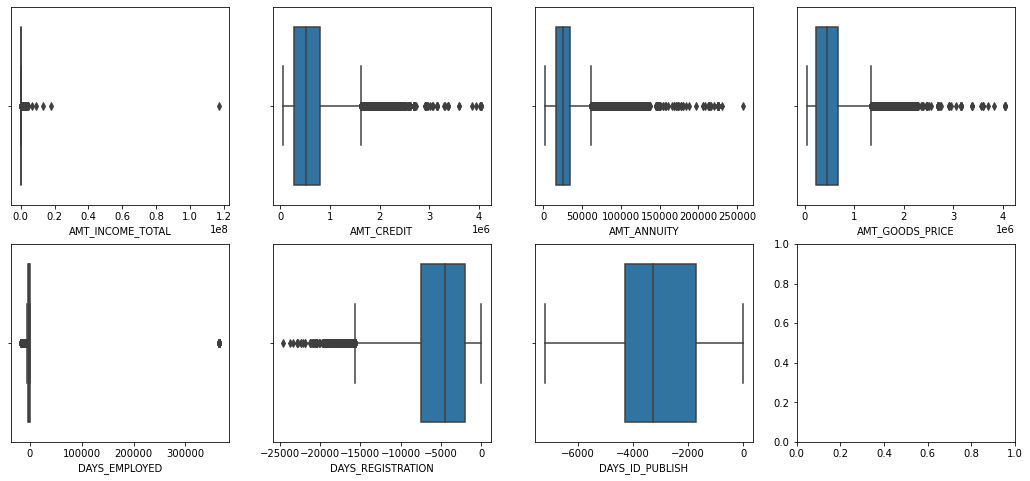

In [22]:
m = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
fig,axes = plt.subplots(2,4,figsize = (18,8))
for i in range(7):
    plt.subplot(2,4,i+1)
    sns.boxplot(data_1[m[i]])
plt.show()

# Logistic Regression (STAGE 1)

In [23]:
p = data.dropna()
p = pd.get_dummies(p)
Xs1 = p.drop(['TARGET'],axis = 1)
ys1 = p['TARGET']


from sklearn.model_selection import train_test_split
X_trains1,X_tests1,y_trains1,y_tests1 = train_test_split(Xs1,ys1,random_state = 355,test_size = 0.3)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [26]:
models1 = LogisticRegression(random_state = 0)
models1.fit(X_trains1, y_trains1)

LogisticRegression(random_state=0)

In [27]:
y_pred_trains1 = models1.predict(X_trains1)

In [28]:
y_preds1 = models1.predict(X_tests1)
y_probs1 = models1.predict_proba(X_tests1)

In [29]:
print("Training accuracy is: ",accuracy_score(y_trains1,y_pred_trains1))
print("Testing accuracy is: ",accuracy_score(y_tests1,y_preds1))

Training accuracy is:  0.9375519016774622
Testing accuracy is:  0.9418829910887253


In [30]:
print("Training ROC AUC score is: ",roc_auc_score(y_trains1,y_pred_trains1))
print("Testing ROC AUC score is: ",roc_auc_score(y_tests1,y_preds1))

Training ROC AUC score is:  0.5
Testing ROC AUC score is:  0.5


In [31]:
print(metrics.classification_report(y_tests1,y_preds1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2431
           1       0.00      0.00      0.00       150

    accuracy                           0.94      2581
   macro avg       0.47      0.50      0.49      2581
weighted avg       0.89      0.94      0.91      2581



### NULL VALUE: IDENTIFICATION  & TREATMENT

In [32]:
Count = data.isnull().sum().sort_values(ascending = False)
Percentage = (data.isnull().sum().sort_values(ascending = False)*100/len(data)).sort_values(ascending = False)
print(Percentage)

COMMONAREA_AVG              69.872297
COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
FLAG_DOCUMENT_17             0.000000
FLAG_DOCUMENT_18             0.000000
FLAG_DOCUMENT_19             0.000000
FLAG_DOCUMENT_12             0.000000
TARGET                       0.000000
Length: 121, dtype: float64


In [33]:
# list of columns having more than 40% null

col_to_drop = Percentage[Percentage>40].keys()
print("Columns to drop are: \n",col_to_drop)

Columns to drop are: 
 Index(['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_AVG',
       'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_AVG',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE', 'FLOORSMAX_MEDI',
       'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'YEARS

In [34]:
# Drop columns having greater than 40%  null

data2 =  data.drop(col_to_drop, axis=1)
data_t2 = data_t.drop(col_to_drop, axis=1)

In [35]:
# Checking Of Shape of Dataset after removing the columns

print(data2.shape)
print(data_t2.shape)

(307511, 72)
(48744, 71)


In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

#### Merging columns

In [37]:
df = data2
df1 = data_t2

In [38]:
df["Flag_Documents"] = df["FLAG_DOCUMENT_2"]+ df["FLAG_DOCUMENT_3"]+ df["FLAG_DOCUMENT_4"]+ df["FLAG_DOCUMENT_5"]+ df["FLAG_DOCUMENT_6"]+ df["FLAG_DOCUMENT_7"]+ df["FLAG_DOCUMENT_8"]+ df["FLAG_DOCUMENT_9"]+ df["FLAG_DOCUMENT_10"]+ df["FLAG_DOCUMENT_11"]+ df["FLAG_DOCUMENT_3"]+ df["FLAG_DOCUMENT_12"]+ df["FLAG_DOCUMENT_13"]+ df["FLAG_DOCUMENT_14"]+ df["FLAG_DOCUMENT_15"]+ df["FLAG_DOCUMENT_16"]+ df["FLAG_DOCUMENT_17"]+ df["FLAG_DOCUMENT_18"]+ df["FLAG_DOCUMENT_19"]+ df["FLAG_DOCUMENT_3"]+ df["FLAG_DOCUMENT_20"]+ df["FLAG_DOCUMENT_21"]
df1["Flag_Documents"] = df1["FLAG_DOCUMENT_2"]+ df1["FLAG_DOCUMENT_3"]+ df1["FLAG_DOCUMENT_4"]+ df1["FLAG_DOCUMENT_5"]+ df1["FLAG_DOCUMENT_6"]+ df1["FLAG_DOCUMENT_7"]+ df1["FLAG_DOCUMENT_8"]+ df1["FLAG_DOCUMENT_9"]+ df1["FLAG_DOCUMENT_10"]+ df1["FLAG_DOCUMENT_11"]+ df1["FLAG_DOCUMENT_3"]+ df1["FLAG_DOCUMENT_12"]+ df1["FLAG_DOCUMENT_13"]+ df1["FLAG_DOCUMENT_14"]+ df1["FLAG_DOCUMENT_15"]+ df1["FLAG_DOCUMENT_16"]+ df1["FLAG_DOCUMENT_17"]+ df1["FLAG_DOCUMENT_18"]+ df1["FLAG_DOCUMENT_19"]+ df1["FLAG_DOCUMENT_3"]+ df1["FLAG_DOCUMENT_20"]+ df1["FLAG_DOCUMENT_21"]

In [39]:
df.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_3","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"],axis=1,inplace=True)
df1.drop(["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_3","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21"],axis=1,inplace=True)

In [40]:
df.drop(df.index[df['CODE_GENDER'] == 'XNA'], inplace = True)
df1.drop(df1.index[df1['CODE_GENDER'] == 'XNA'], inplace = True)

#### Test-Train Split

In [41]:
X=df.drop(['TARGET'],axis = 1)
y = df['TARGET']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 355,test_size = 0.3)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215254 entries, 73682 to 121601
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NAME_CONTRACT_TYPE           215254 non-null  object 
 1   CODE_GENDER                  215254 non-null  object 
 2   FLAG_OWN_CAR                 215254 non-null  object 
 3   FLAG_OWN_REALTY              215254 non-null  object 
 4   CNT_CHILDREN                 215254 non-null  int64  
 5   AMT_INCOME_TOTAL             215254 non-null  float64
 6   AMT_CREDIT                   215254 non-null  float64
 7   AMT_ANNUITY                  215243 non-null  float64
 8   AMT_GOODS_PRICE              215063 non-null  float64
 9   NAME_TYPE_SUITE              214349 non-null  object 
 10  NAME_INCOME_TYPE             215254 non-null  object 
 11  NAME_EDUCATION_TYPE          215254 non-null  object 
 12  NAME_FAMILY_STATUS           215254 non-null  object 


In [44]:
X_train.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       11
AMT_GOODS_PRICE                  191
NAME_TYPE_SUITE                  905
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                67613
CNT_FAM_MEMBERS                    2
R

In [45]:
df1.isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       24
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                  911
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                15605
CNT_FAM_MEMBERS                    0
R

#### Imputing with mode (only on catagoric var with missing values < 1000)

In [46]:
X_train['NAME_TYPE_SUITE'].fillna(X_train['NAME_TYPE_SUITE'].value_counts().index[0],inplace=True)
X_test['NAME_TYPE_SUITE'].fillna(X_train['NAME_TYPE_SUITE'].value_counts().index[0],inplace=True)

In [47]:
df1['NAME_TYPE_SUITE'].fillna(df1['NAME_TYPE_SUITE'].value_counts().index[0],inplace=True)

#### Imputing with term 'missing' (only on catagoric var with missing values > 1000)

In [48]:
X_train['OCCUPATION_TYPE'].fillna("Missing",inplace = True)
X_test['OCCUPATION_TYPE'].fillna("Missing",inplace = True)

In [49]:
df1['OCCUPATION_TYPE'].fillna("Missing",inplace = True)

#### Imputing with median (only on numeric var with missing values < 1000)

In [50]:
l= ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

# Imputing numeric variables with less than 1000 missing values of training dataset by median of train
for i in l:
    X_train[i].fillna(X_train[i].median(),inplace=True)

# Imputing numeric variables with less than 1000 missing values of testing dataset by median of train
for i in l:
    X_test[i].fillna(X_train[i].median(),inplace=True)

In [51]:
l= ['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

# Imputing numeric variables with less than 1000 missing values of training dataset by median of train
for i in l:
    df1[i].fillna(X_train[i].median(),inplace=True)

#### For (numeric var > 1000)  we apply MICE Method
#### MICE: Multivariate Imputation by Chained Equations
The mice package implements a method to deal with missing data. The package creates multiple imputations (replacement values) for multivariate missing data. The method is based on Fully Conditional Specification, where each incomplete variable is imputed by a separate model. The MICE algorithm can impute mixes of continuous, binary, unordered categorical and ordered categorical data. In addition, MICE can impute continuous two-level data, and maintain consistency between imputations by means of passive imputation. Many diagnostic plots are implemented to inspect the quality of the imputations.

In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [53]:
numeric_data = X_train.select_dtypes(include=[np.number])
categorical_data = X_train.select_dtypes(exclude=[np.number])

numeric_data_t = X_test.select_dtypes(include=[np.number])
categorical_data_t = X_test.select_dtypes(exclude=[np.number])

In [54]:
numeric_datat = df1.select_dtypes(include=[np.number])
categorical_datat = df1.select_dtypes(exclude=[np.number])

In [55]:
numeric_datat.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_

In [56]:
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)

result1=imp.fit_transform(numeric_data)
result2=imp.transform(numeric_data_t)
res = imp.transform(numeric_datat)

[IterativeImputer] Completing matrix with shape (215254, 40)
[IterativeImputer] Ending imputation round 1/10, elapsed time 30.35
[IterativeImputer] Change: 6.508147262313654, scaled tolerance: 117000.0 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (92253, 40)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.16
[IterativeImputer] Completing matrix with shape (48744, 40)
[IterativeImputer] Ending imputation round 1/1, elapsed time 0.08


In [57]:
t1= pd.DataFrame(result1,columns=numeric_data.columns)
X_train[numeric_data.columns] = t1[numeric_data.columns].values

t2= pd.DataFrame(result2,columns=numeric_data_t.columns)
X_test[numeric_data_t.columns] = t2[numeric_data_t.columns].values

In [58]:
t= pd.DataFrame(res,columns=numeric_datat.columns)
df1[numeric_datat.columns] = t[numeric_datat.columns].values

In [59]:
# All null values treated
print("Null values in\nTrain data: ",X_train.isnull().sum().sum(),"\nTest Data: ",X_test.isnull().sum().sum())

Null values in
Train data:  0 
Test Data:  0


In [60]:
# All null values treated
print("Null values in\nTesting data: ",df1.isnull().sum().sum())

Null values in
Testing data:  0


### ENCODING: WEIGHT OF EVIDENCE (WOE)

In [61]:
from feature_engine.encoding import RareLabelEncoder,WoEEncoder

In [62]:
# set up a rare label encoder
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=3, variables=['NAME_INCOME_TYPE'])

# fit and transform data
X_train = rare_encoder.fit_transform(X_train)
X_test = rare_encoder.transform(X_test)

In [63]:
df1 = rare_encoder.transform(df1)

In [64]:
# set up a rare label encoder
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=8, variables=['OCCUPATION_TYPE'])

# fit and transform data
X_train = rare_encoder.fit_transform(X_train)
X_test = rare_encoder.transform(X_test)

In [65]:
df1 = rare_encoder.transform(df1)

In [66]:
# set up a rare label encoder
rare_encoder = RareLabelEncoder(tol=0.03, n_categories=8, variables=['ORGANIZATION_TYPE'])

# fit and transform data
X_train = rare_encoder.fit_transform(X_train)
X_test = rare_encoder.transform(X_test)

In [67]:
df1 = rare_encoder.transform(df1)

In [68]:
# set up a rare label encoder
rare_encoder = RareLabelEncoder(tol=0.06, n_categories=2, variables=['NAME_FAMILY_STATUS'])

# fit and transform data
X_train = rare_encoder.fit_transform(X_train)
X_test = rare_encoder.transform(X_test)

In [69]:
df1 = rare_encoder.transform(df1)

In [70]:
woe_encoder = WoEEncoder(variables=['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',"FLAG_OWN_CAR","FLAG_OWN_REALTY","NAME_TYPE_SUITE","WEEKDAY_APPR_PROCESS_START"
                                    ,"NAME_EDUCATION_TYPE","NAME_INCOME_TYPE","ORGANIZATION_TYPE","NAME_CONTRACT_TYPE",'OCCUPATION_TYPE'])

# fit the encoder
woe_encoder.fit(X_train,y_train)

WoEEncoder(variables=['CODE_GENDER', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                      'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
                      'WEEKDAY_APPR_PROCESS_START', 'NAME_EDUCATION_TYPE',
                      'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE',
                      'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE'])

In [71]:
woe_encoder.encoder_dict_

{'CODE_GENDER': {'F': -0.15644906323111554, 'M': 0.25378399699516085},
 'NAME_FAMILY_STATUS': {'Civil marriage': 0.21241717836866705,
  'Married': -0.07063745624129432,
  'Rare': -0.32533647729013687,
  'Separated': 0.007640822622475149,
  'Single / not married': 0.22081614641125527},
 'NAME_HOUSING_TYPE': {'Co-op apartment': -0.027562027123394315,
  'House / apartment': -0.03951499417336006,
  'Municipal apartment': 0.0856715914584808,
  'Office apartment': -0.1769829909091479,
  'Rented apartment': 0.4419438137426718,
  'With parents': 0.4199802657978759},
 'FLAG_OWN_CAR': {'N': 0.055053712557577676, 'Y': -0.11463411200274727},
 'FLAG_OWN_REALTY': {'N': 0.01931851864010225, 'Y': -0.008616219756984273},
 'NAME_TYPE_SUITE': {'Children': -0.0689288323354146,
  'Family': -0.06610570942868427,
  'Group of people': 0.05445811121733548,
  'Other_A': 0.06304993715365148,
  'Other_B': 0.14525397245541716,
  'Spouse, partner': -0.012475310101198544,
  'Unaccompanied': 0.01034528141835023},
 'W

In [72]:
# transform
X_train = woe_encoder.transform(X_train)
X_test = woe_encoder.transform(X_test)

In [73]:
# transform
df1 = woe_encoder.transform(df1)

In [74]:
df1.shape[0]

48744

In [75]:
data5 = pd.concat([X_train,X_test])
data5.sort_index()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Flag_Documents
0,0.035523,0.253784,0.055054,-0.008616,0.0,202500.0,406597.5,24700.5,351000.0,0.010345,...,2.0,2.0,-1134.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
1,0.035523,-0.156449,0.055054,0.019319,0.0,270000.0,1293502.5,35698.5,1129500.0,-0.066106,...,1.0,0.0,-828.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
2,-0.404422,0.253784,-0.114634,-0.008616,0.0,67500.0,135000.0,6750.0,135000.0,0.010345,...,0.0,0.0,-815.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.035523,-0.156449,0.055054,-0.008616,0.0,135000.0,312682.5,29686.5,297000.0,0.010345,...,2.0,0.0,-617.0,0.006070,0.005978,0.041596,0.230584,0.260062,2.058229,3.0
4,0.035523,0.253784,0.055054,-0.008616,0.0,121500.0,513000.0,21865.5,513000.0,0.010345,...,0.0,0.0,-1106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.035523,0.253784,0.055054,0.019319,0.0,157500.0,254700.0,27558.0,225000.0,0.010345,...,0.0,0.0,-273.0,0.006094,0.007704,0.034664,0.310117,0.233432,1.504916,1.0
307507,0.035523,-0.156449,0.055054,-0.008616,0.0,72000.0,269550.0,12001.5,225000.0,0.010345,...,0.0,0.0,0.0,0.005949,0.007955,0.033064,0.175016,0.279236,2.018590,3.0
307508,0.035523,-0.156449,0.055054,-0.008616,0.0,153000.0,677664.0,29979.0,585000.0,0.010345,...,6.0,0.0,-1909.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.0
307509,0.035523,-0.156449,0.055054,-0.008616,0.0,171000.0,370107.0,20205.0,319500.0,0.010345,...,0.0,0.0,-322.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0


## Statistical Tests

In [76]:
categorical = [i for i in data5.columns if len(data5[str(i)].unique()) < 20  ]
numerical = [i for i in data5.columns if i not in categorical and i != 'ORGANIZATION_TYPE']

In [77]:
categorical.append('ORGANIZATION_TYPE')

In [78]:
#H0: the sample has a Gaussian distribution.
#H1: the sample does not have a Gaussian distribution.

In [79]:
#  Shapiro-Wilk Normality Test for test of normality
from scipy.stats import shapiro
d={}
for i in numerical:
    stat1 , p = shapiro(data5[i])
    print('stat=%.3f, p=%.3f' % (stat1, p))
    if p > 0.05:
        d.update({i:'Probably Gaussian'})
    else:
        d.update({i:'Probably Not Gaussian'})

stat=0.138, p=0.000
stat=0.906, p=0.000
stat=0.912, p=0.000
stat=0.889, p=0.000
stat=0.877, p=0.000
stat=0.970, p=0.000
stat=0.481, p=0.000
stat=0.954, p=0.000
stat=0.941, p=0.000
stat=0.989, p=0.000
stat=0.927, p=0.000
stat=0.982, p=0.000
stat=0.623, p=0.000
stat=0.621, p=0.000
stat=0.921, p=0.000
stat=0.051, p=0.000
stat=0.038, p=0.000
stat=0.165, p=0.000
stat=0.319, p=0.000
stat=0.320, p=0.000
stat=0.871, p=0.000


In [80]:
d

{'AMT_INCOME_TOTAL': 'Probably Not Gaussian',
 'AMT_CREDIT': 'Probably Not Gaussian',
 'AMT_ANNUITY': 'Probably Not Gaussian',
 'AMT_GOODS_PRICE': 'Probably Not Gaussian',
 'REGION_POPULATION_RELATIVE': 'Probably Not Gaussian',
 'DAYS_BIRTH': 'Probably Not Gaussian',
 'DAYS_EMPLOYED': 'Probably Not Gaussian',
 'DAYS_REGISTRATION': 'Probably Not Gaussian',
 'DAYS_ID_PUBLISH': 'Probably Not Gaussian',
 'HOUR_APPR_PROCESS_START': 'Probably Not Gaussian',
 'EXT_SOURCE_2': 'Probably Not Gaussian',
 'EXT_SOURCE_3': 'Probably Not Gaussian',
 'OBS_30_CNT_SOCIAL_CIRCLE': 'Probably Not Gaussian',
 'OBS_60_CNT_SOCIAL_CIRCLE': 'Probably Not Gaussian',
 'DAYS_LAST_PHONE_CHANGE': 'Probably Not Gaussian',
 'AMT_REQ_CREDIT_BUREAU_HOUR': 'Probably Not Gaussian',
 'AMT_REQ_CREDIT_BUREAU_DAY': 'Probably Not Gaussian',
 'AMT_REQ_CREDIT_BUREAU_WEEK': 'Probably Not Gaussian',
 'AMT_REQ_CREDIT_BUREAU_MON': 'Probably Not Gaussian',
 'AMT_REQ_CREDIT_BUREAU_QRT': 'Probably Not Gaussian',
 'AMT_REQ_CREDIT_BUREAU

In [81]:
# So we see that some of the variables are not normally distributed so we change it in further section

In [82]:
X1 = data5
data6 = pd.concat([y_train,y_test])
data6.sort_index()
Y = data6

In [83]:
# To test the Equality of means
import scipy.stats as stats
for i in numerical:
    print(i,': ',stats.f_oneway(X1[i][Y == 0],X1[i][Y == 1]))

AMT_INCOME_TOTAL :  F_onewayResult(statistic=4.874940497838415, pvalue=0.02725011559539886)
AMT_CREDIT :  F_onewayResult(statistic=283.90891893346287, pvalue=1.1283345778658891e-63)
AMT_ANNUITY :  F_onewayResult(statistic=50.52154403979985, pvalue=1.181182345206325e-12)
AMT_GOODS_PRICE :  F_onewayResult(statistic=483.57737532825814, pvalue=4.3066709585164264e-107)
REGION_POPULATION_RELATIVE :  F_onewayResult(statistic=426.69809038857176, pvalue=9.864650132775479e-95)
DAYS_BIRTH :  F_onewayResult(statistic=1894.0903682296619, pvalue=0.0)
DAYS_EMPLOYED :  F_onewayResult(statistic=622.1176491403434, pvalue=3.548822689388271e-137)
DAYS_REGISTRATION :  F_onewayResult(statistic=542.7787557353802, pvalue=5.959413197880351e-120)
DAYS_ID_PUBLISH :  F_onewayResult(statistic=816.3885804901963, pvalue=2.537564154148633e-179)
HOUR_APPR_PROCESS_START :  F_onewayResult(statistic=179.65220427690895, pvalue=5.927564423374171e-41)
EXT_SOURCE_2 :  F_onewayResult(statistic=8109.503549337757, pvalue=0.0)
E

In [84]:
# Test to check the equality of variance
import scipy.stats as stats
for i in numerical:
    print(i,': ',stats.levene(X1[i][Y == 0],X1[i][Y == 1]))

AMT_INCOME_TOTAL :  LeveneResult(statistic=2.4342603615333043, pvalue=0.11871090494440566)
AMT_CREDIT :  LeveneResult(statistic=837.7919617816744, pvalue=5.802405008985919e-184)
AMT_ANNUITY :  LeveneResult(statistic=442.8584385207925, pvalue=3.032754543745984e-98)
AMT_GOODS_PRICE :  LeveneResult(statistic=974.1362878719124, pvalue=1.626336231161641e-213)
REGION_POPULATION_RELATIVE :  LeveneResult(statistic=443.7551770975186, pvalue=1.9362284957349614e-98)
DAYS_BIRTH :  LeveneResult(statistic=211.4788827319027, pvalue=6.778808392542112e-48)
DAYS_EMPLOYED :  LeveneResult(statistic=675.3796782500687, pvalue=9.794562241202953e-149)
DAYS_REGISTRATION :  LeveneResult(statistic=282.930250382864, pvalue=1.8428980848179485e-63)
DAYS_ID_PUBLISH :  LeveneResult(statistic=23.63138514091425, pvalue=1.1672643373612021e-06)
HOUR_APPR_PROCESS_START :  LeveneResult(statistic=0.942758530923628, pvalue=0.3315701899378132)
EXT_SOURCE_2 :  LeveneResult(statistic=1981.0767050463066, pvalue=0.0)
EXT_SOURCE_3

On Checking for eqaulity of mean and variance we see that for two variables 'AMT_REQ_CREDIT_BUREAU_HOUR' and 'AMT_REQ_CREDIT_BUREAU_WEEK' there p value is greater than calculated test statistic , so we reject null hypothesis that means are equal and as a treatement we drop those columns

In [85]:
# Chi-Square test for Checking of Independence of variables.
from scipy import stats
print("H0 : Assume there is no dependence between two variable")
print("H1 : Assume there is dependence between two variable")
var1 = []
var2 = []
chi2 = []
df = []
p = []
d = [] 
h = []
for i in categorical:
            cross_tab = pd.crosstab(X1[str(i)],Y)
            chi2_stat, p_val, dof, ex = stats.chi2_contingency(cross_tab)
            var1.append(i)
            var2.append('TARGET')
            chi2.append(chi2_stat)
            df.append(dof)
            p.append(p_val)
            if p_val > 0.05:
                d.append('Independent')
                h.append('Accepted')
            else:
                d.append('Dependent')
                h.append('Rejected')
a = pd.DataFrame([var1,var2,chi2,df,p,d,h],index=['variable 1','variable 2','Chi2 Value','DOF','P Value','Decison (5% LOS)','Null Hypothesis']).T
a

H0 : Assume there is no dependence between two variable
H1 : Assume there is dependence between two variable


,variable 1,variable 2,Chi2 Value,DOF,P Value,Decison (5% LOS),Null Hypothesis
0,NAME_CONTRACT_TYPE,TARGET,292.957676,1,0.0,Dependent,Rejected
1,CODE_GENDER,TARGET,920.005725,1,0.0,Dependent,Rejected
2,FLAG_OWN_CAR,TARGET,146.639147,1,0.0,Dependent,Rejected
3,FLAG_OWN_REALTY,TARGET,11.566092,1,0.000672,Dependent,Rejected
4,CNT_CHILDREN,TARGET,185.468398,14,0.0,Dependent,Rejected
5,NAME_TYPE_SUITE,TARGET,31.941731,6,0.000017,Dependent,Rejected
6,NAME_INCOME_TYPE,TARGET,1228.072167,4,0.0,Dependent,Rejected
7,NAME_EDUCATION_TYPE,TARGET,1019.200873,4,0.0,Dependent,Rejected
8,NAME_FAMILY_STATUS,TARGET,504.609714,4,0.0,Dependent,Rejected
9,NAME_HOUSING_TYPE,TARGET,420.543878,5,0.0,Dependent,Rejected


Since 4 columns are independent of Target so we drop those columns

In [86]:
X_train.drop(['LIVE_REGION_NOT_WORK_REGION','FLAG_EMAIL','FLAG_MOBIL','FLAG_CONT_MOBILE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK'],axis = 1 ,inplace  = True)
X_test.drop(['LIVE_REGION_NOT_WORK_REGION','FLAG_EMAIL','FLAG_MOBIL','FLAG_CONT_MOBILE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK'],axis = 1 ,inplace  = True)
df1.drop(['LIVE_REGION_NOT_WORK_REGION','FLAG_EMAIL','FLAG_MOBIL','FLAG_CONT_MOBILE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK'],axis = 1 ,inplace  = True)

### FEATURE SELECTION: INFORMATION VALUE (IV)

In [87]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [88]:
final_iv, IV = data_vars(X_train,y_train)

In [89]:
IV = IV.rename(columns={'VAR_NAME':'index'})

In [90]:
l = IV.sort_values(['IV'],ascending=0)['index'].to_list()

In [91]:
l

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'DAYS_BIRTH',
 'OCCUPATION_TYPE',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'ORGANIZATION_TYPE',
 'DAYS_ID_PUBLISH',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_REGISTRATION',
 'REG_CITY_NOT_LIVE_CITY',
 'NAME_FAMILY_STATUS',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'NAME_CONTRACT_TYPE',
 'NAME_HOUSING_TYPE',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_OWN_CAR',
 'REGION_POPULATION_RELATIVE',
 'HOUR_APPR_PROCESS_START',
 'Flag_Documents',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'NAME_EDUCATION_TYPE',
 'AMT_CREDIT',
 'CNT_CHILDREN',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'WEEKDAY_APPR_PROCESS_START',
 'AMT_ANNUITY',
 'REG_REGION_NOT_WORK_REGION

In [92]:
print(X_test[l[:30]].columns)

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'OCCUPATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_INCOME_TYPE', 'CODE_GENDER',
       'ORGANIZATION_TYPE', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE',
       'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REGION_RATING_CLIENT', 'DAYS_REGISTRATION',
       'REG_CITY_NOT_LIVE_CITY', 'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_OWN_CAR', 'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START',
       'Flag_Documents', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')


In [93]:
# Performing Feature selection and selecting top 30 columns from the list 

X_train = X_train[l[:30]]
X_test = X_test[l[:30]]

In [94]:
# Performing Feature selection and selecting top 30 columns from the list 

df1 = df1[l[:30]]


### MULTICOLLINEARLITY CHECK

In [95]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
X_train.drop(to_drop, axis=1, inplace=True)

In [96]:
# Drop features 
df1.drop(to_drop, axis=1, inplace=True)

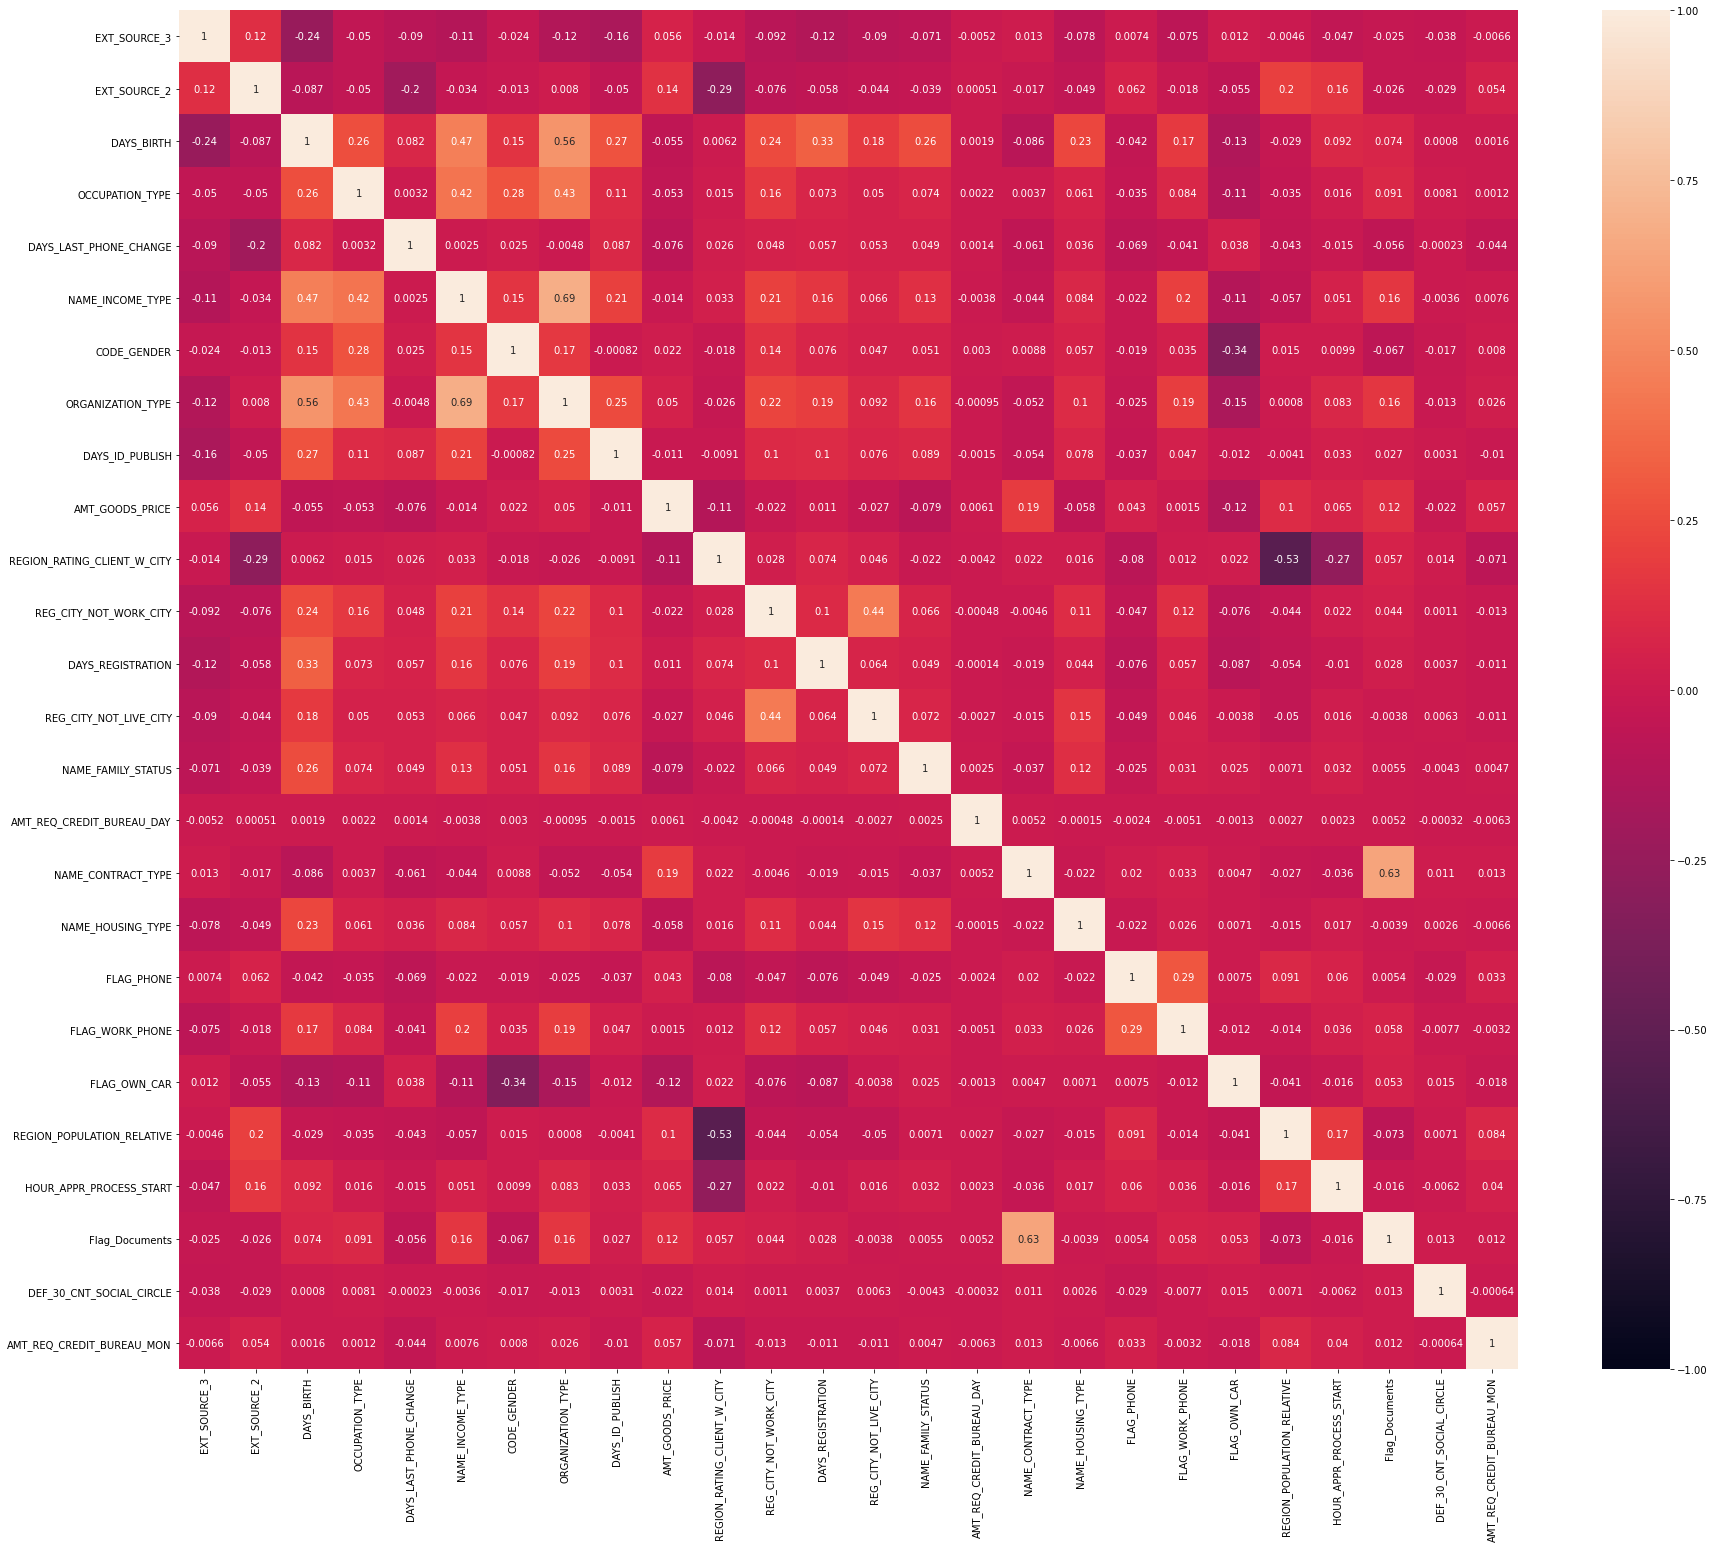

In [97]:
plt.figure(figsize=(30,25))
sns.heatmap(X_train.corr(),annot = True,vmin = -1,vmax = 1)
plt.show()

In [98]:
l3= X_train.columns.to_list()

In [99]:
X_test = X_test[l3]

In [100]:
print(list(X_train.columns) == list(X_test.columns)) 

True


### SCALING

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
numerical.remove('AMT_REQ_CREDIT_BUREAU_HOUR')
numerical.remove('AMT_REQ_CREDIT_BUREAU_WEEK')

In [103]:
numerical

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [104]:
X_train.columns

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'OCCUPATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE', 'NAME_INCOME_TYPE', 'CODE_GENDER',
       'ORGANIZATION_TYPE', 'DAYS_ID_PUBLISH', 'AMT_GOODS_PRICE',
       'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY',
       'DAYS_REGISTRATION', 'REG_CITY_NOT_LIVE_CITY', 'NAME_FAMILY_STATUS',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE',
       'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLAG_OWN_CAR',
       'REGION_POPULATION_RELATIVE', 'HOUR_APPR_PROCESS_START',
       'Flag_Documents', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_MON'],
      dtype='object')

In [105]:
l=X_train.columns
list1 = [ele for ele in l if ele  in numerical]

In [106]:
#l  = ['DAYS_BIRTH','EXT_SOURCE_3','EXT_SOURCE_2','DAYS_ID_PUBLISH','REGION_POPULATION_RELATIVE','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','AMT_GOODS_PRICE','REG_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT_W_CITY','REG_CITY_NOT_LIVE_CITY','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_MON']
scaler = MinMaxScaler()
X_train.loc[:,list1] = scaler.fit_transform(X_train.loc[:,list1])
X_test.loc[:,list1] = scaler.transform(X_test.loc[:,list1])
    

In [107]:
df1.loc[:,list1] = scaler.transform(df1.loc[:,list1])    

In [108]:
X_train

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,CODE_GENDER,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,AMT_GOODS_PRICE,...,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,Flag_Documents,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON
73682,0.647906,0.800178,0.215368,0.298082,0.678472,0.184792,0.253784,0.148624,0.405870,0.158249,...,0.035523,-0.039515,1.0,1.0,0.055054,0.336758,0.695652,3.0,0.0,0.005336
204563,0.794035,0.471538,0.864605,-0.257508,0.754660,-0.081071,-0.156449,0.016931,0.693861,0.084175,...,0.035523,-0.039515,0.0,0.0,0.055054,0.276330,0.434783,3.0,0.0,0.005336
243940,0.667002,0.443332,0.823821,-0.274524,0.667288,-0.081071,-0.156449,0.016931,0.745148,0.046016,...,0.035523,-0.039515,0.0,0.0,0.055054,0.311695,0.565217,3.0,0.0,0.005336
54995,0.790627,0.861318,0.014867,-0.225002,0.429870,-0.407830,0.253784,-0.404203,0.300615,0.046016,...,0.035523,-0.039515,1.0,0.0,-0.114634,0.048852,0.391304,3.0,0.0,0.005336
183896,0.655815,0.603756,0.593301,-0.025660,0.169851,-0.380586,-0.156449,-0.231859,0.284993,0.070707,...,0.035523,-0.039515,0.0,0.0,0.055054,0.206749,0.347826,3.0,0.0,0.005336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72997,0.632469,0.809868,0.742652,0.180642,0.788444,0.184792,-0.156449,0.148624,0.289885,0.102132,...,0.035523,-0.039515,1.0,1.0,0.055054,0.361433,0.826087,3.0,0.0,0.048583
286201,0.750379,0.712841,0.821315,-0.025660,0.447810,-0.081071,-0.156449,0.016931,0.579927,0.010101,...,0.035523,0.419980,1.0,0.0,-0.114634,0.361433,0.391304,3.0,0.0,0.005336
257374,0.769658,0.306735,0.225906,0.366267,0.548462,-0.081071,0.253784,0.148624,0.245384,0.158249,...,0.035523,-0.039515,0.0,0.0,-0.114634,0.344429,0.478261,3.0,1.0,0.005336
150149,0.717849,0.720851,0.709102,0.298082,0.657036,0.184792,0.253784,0.148624,0.846931,0.034792,...,-0.404422,-0.039515,0.0,0.0,-0.114634,0.048783,0.478261,0.0,1.0,0.005336


### IMBALANCE TREATMENT

In [109]:
from imblearn.over_sampling import RandomOverSampler

In [110]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# MODELLING

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

In [112]:
# Creating a Function for metrics of model
from sklearn.metrics import confusion_matrix, roc_auc_score
def score(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    conf_mat = confusion_matrix(y_test,y_pred)
    true_positive = conf_mat[1][1]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[0][0]
    
    Accuracy = (true_positive+true_negative)/(true_positive+true_negative+false_negative+false_positive)
    Precision = true_positive/(true_positive+false_positive)
    Recall = true_positive/(true_positive+false_negative)
    F1_Score = 2*(Recall * Precision) / (Recall + Precision)
    auc = roc_auc_score(y_test, y_pred)
    
    print('Model Name\t',model)
    print('Accuracy\t {:.4f}'.format(Accuracy))
    print('Precision\t {:.4f}'.format(Precision))
    print('Recall\t\t {:.4f}'.format(Recall))
    print('F1 Score\t {:.4f}'.format(F1_Score))
    print('AUC\t\t {:.4f}'.format(auc))

## Logistic Regression

In [148]:
from sklearn.linear_model  import LogisticRegression
# create model
model = LogisticRegression()
model.fit(X_train_res,y_train_res)
score(model,X_test,y_test)
y_prob1 = model.predict_proba(X_test)
y_pred1 = model.predict(X_test)

Model Name	 LogisticRegression()
Accuracy	 0.6832
Precision	 0.1539
Recall		 0.6592
F1 Score	 0.2496
AUC		 0.6722


## Decision Tree

In [114]:
from sklearn.tree import DecisionTreeClassifier
# create model
model = DecisionTreeClassifier()
model.fit(X_train_res,y_train_res)
score(model,X_test,y_test)

Model Name	 DecisionTreeClassifier()
Accuracy	 0.8602
Precision	 0.1432
Recall		 0.1503
F1 Score	 0.1466
AUC		 0.5361


## Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier
# create model
model = RandomForestClassifier()
model.fit(X_train_res,y_train_res)
score(model,X_test,y_test)

Model Name	 RandomForestClassifier()
Accuracy	 0.9193
Precision	 0.3950
Recall		 0.0194
F1 Score	 0.0370
AUC		 0.5084


## Naive Bayes

In [116]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_res,y_train_res)
score(model,X_test,y_test)

Model Name	 GaussianNB()
Accuracy	 0.6178
Precision	 0.1317
Recall		 0.6764
F1 Score	 0.2205
AUC		 0.6445


## XG Boost

In [118]:
from xgboost import XGBClassifier
# create model
model = XGBClassifier()
model.fit(X_train_res,y_train_res)
score(model,X_test,y_test)

Model Name	 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy	 0.7235
Precision	 0.1630
Recall		 0.5950
F1 Score	 0.2559
AUC		 0.6648


## LIGHT GBM

In [121]:
import lightgbm as lgb
# create model
model = lgb.LGBMClassifier()
model.fit(X_train_res,y_train_res)
score(model,X_test,y_test)

Model Name	 LGBMClassifier()
Accuracy	 0.6985
Precision	 0.1600
Recall		 0.6521
F1 Score	 0.2569
AUC		 0.6773


In [122]:
# On seeing  the above results of all the model we take the top 2 models and perform hyper parameter tuning to these.

In [123]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe 

In [124]:
# xgboost

space = {'max_depth': hp.quniform("max_depth", 3,18,1),
         'gamma': hp.uniform('gamma', 1,9), 
         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1), 
         'reg_lambda' : hp.uniform('reg_lambda', 0,1), 
         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1), 
         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1), 
         'n_estimators': 300, 
         'seed': 0
        }

def objective (space): 
    clf=XGBClassifier(n_estimators = int(space['n_estimators']),
                          max_depth = int(space['max_depth']), gamma = space['gamma'],
                          reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                          colsample_bytreerint =  (space['colsample_bytree']))
    evaluation = [( X_train_res, y_train_res), ( X_test, y_test)]
    clf.fit(X_train_res, y_train_res, eval_set=evaluation, eval_metric="auc", early_stopping_rounds=10, verbose=False)
    pred = clf.predict(X_test) 
    y_score = clf.predict_proba(X_test)[:,1] 
    accuracy = accuracy_score(y_test, pred>0.5) 
    Roc_Auc_Score = roc_auc_score(y_test, y_score) 
    print ("ROC-AUC Score:", Roc_Auc_Score) 
    print ("SCORE:", accuracy) 
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [125]:
trials = Trials() 
best_hyperparams = fmin(fn = objective, space = space, 
                        algo = tpe.suggest, max_evals = 100,
                        trials = trials) 
print("The best hyperparameters are : ","\n") 
print(best_hyperparams)

[17:53:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                                                                         
0.729880441386811                                                                                                      
SCORE:                                                                                                                 
0.7296022893564437                                                                                                     
[17:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_releas

SCORE:                                                                                                                 
0.7061775768809686                                                                                                     
[17:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                                                                         
0.7378360014370899                                                                                                     
SCORE:                                                                   

ROC-AUC Score:                                                                                                         
0.7339237885626708                                                                                                     
SCORE:                                                                                                                 
0.7197164319859517                                                                                                     
[19:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7416087197818978                                                                                                     
SCORE:                                                                                                                 
0.6927037603113178                                                                                                     
[19:42:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.735110347341914                                                                                                      
SCORE:                                                                                                                 
0.7100582094891223                                                                                                     
[19:49:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7308898814138705                                                                                                     
SCORE:                                                                                                                 
0.7227298841230095                                                                                                     
[19:57:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.742442046936673                                                                                                      
SCORE:                                                                                                                 
0.69609660390448                                                                                                       
[20:02:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7384620222573818                                                                                                     
SCORE:                                                                                                                 
0.7046383315447736                                                                                                     
[20:06:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7409138245512801                                                                                                     
SCORE:                                                                                                                 
0.6983187538616631                                                                                                     
[20:11:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7384646156538497                                                                                                     
SCORE:                                                                                                                 
0.7000856340715207                                                                                                     
[20:16:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7347917494646705                                                                                                     
SCORE:                                                                                                                 
0.7054187939687598                                                                                                     
[20:21:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

ROC-AUC Score:                                                                                                         
0.7421223289294703                                                                                                     
SCORE:                                                                                                                 
0.6939286527267406                                                                                                     
[20:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627:                   
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


ROC-AUC Score:                                                           

In [126]:
#{'colsample_bytree': 0.8006867785320115, 'gamma': 3.1188192708275064, 'max_depth': 4.0, 'min_child_weight': 5.0, 'reg_alpha': 133.0, 'reg_lambda': 0.6374012888856481}

model2 = XGBClassifier(n_estimators = space['n_estimators'],max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                          reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                          colsample_bytreerint = (best_hyperparams['colsample_bytree']))

# fit the model with the training data
model2.fit(X_train_res,y_train_res)

[20:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bytreerint" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              colsample_bytreerint=0.9283891761801643,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=4.805404945107058, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=3,
              max_leaves=0, min_child_weight=0, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=80, ...)

In [127]:
y_pred_train2 = model2.predict(X_train_res)

In [128]:
y_pred2 = model2.predict(X_test)
y_prob2 = model2.predict_proba(X_test)

In [129]:
print("Training accuracy is: ",accuracy_score(y_train_res,y_pred_train2))
print("Testing accuracy is: ",accuracy_score(y_test,y_pred2))

Training accuracy is:  0.7086505697616808
Testing accuracy is:  0.7001940316304077


In [130]:
print("Training ROC AUC score is: ",roc_auc_score(y_train_res,y_pred_train2))
print("Testing ROC AUC score is: ",roc_auc_score(y_test,y_pred2))

Training ROC AUC score is:  0.708650569761681
Testing ROC AUC score is:  0.6755152909404145


In [131]:
print(metrics.classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84880
           1       0.16      0.65      0.26      7373

    accuracy                           0.70     92253
   macro avg       0.56      0.68      0.53     92253
weighted avg       0.89      0.70      0.77     92253



In [132]:
1 # lightGBM 
def gb_mse_cv(space):
    # we use this params to create a new LGBM Regressor 
    model = lgb.LGBMClassifier (n_estimators= int(space['n_estimators']),max_depth= int(space['max_depth']),
                                learning_rate= space['learning_rate'],gamma= space['gamma'],
                                num_leaves = int(space['num_leaves']),reg_alpha = space['reg_alpha'], 
                                reg_lambda = space['reg_lambda'], colsample_bytre = space['colsample_bytree'], 
                                min_child_weight = space['min_child_weight'])
    # and then conduct the cross validation with the same folds as before 
    score = -cross_val_score (model, X_train_res, y_train_res , cv=10, scoring="roc_auc").mean()
    return score

In [133]:
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 2, 8, 1), 'learning_rate': hp.loguniform("learning_rate",-4,-1),
       'gamma': hp.quniform('gamma',0.1,0.5,0.1), 'num_leaves': hp.quniform('num_leaves', 30,50,1), 
       'reg_alpha' : hp.quniform('reg_alpha',1.1,1.5,0.1), 'reg_lambda' : hp.uniform('reg_lambda',1.1,1.5), 
       'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,0.5), 
       'min_child_weight' : hp.quniform( 'min_child_weight', 0, 10, 1)
      }

# trials will contain logging information 
trials = Trials ()
best=fmin(fn=gb_mse_cv, # function to optimize 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically 
          max_evals=10, # maximum number of iterations 
          trials = trials, # logging
          space = space)

[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: 

[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: 

[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: colsample_bytre                                                                
[LightGBM] [Warning] Unknown parameter: gamma                                                                          
[LightGBM] [Warning] Unknown parameter: 

In [134]:
print(best)

{'colsample_bytree': 0.27652972443232265, 'gamma': 0.5, 'learning_rate': 0.2052455560438496, 'max_depth': 6.0, 'min_child_weight': 7.0, 'n_estimators': 162.0, 'num_leaves': 41.0, 'reg_alpha': 1.4000000000000001, 'reg_lambda': 1.3336205919668154}


In [135]:
model3 = lgb.LGBMClassifier( n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']), learning_rate=best['learning_rate'], 
                           gamma=best['gamma'], reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'], 
                           colsample_bytree=best['colsample_bytree'],
                           min_child_weight=best['min_child_weight'])
model3.fit(X_train_res,y_train_res)

[LightGBM] [Warning] Unknown parameter: gamma


LGBMClassifier(colsample_bytree=0.27652972443232265, gamma=0.5,
               learning_rate=0.2052455560438496, max_depth=6,
               min_child_weight=7.0, n_estimators=162,
               reg_alpha=1.4000000000000001, reg_lambda=1.3336205919668154)

In [136]:
y_pred_train3 = model3.predict(X_train_res)

In [137]:
y_pred3 = model3.predict(X_test)
y_prob3 = model3.predict_proba(X_test)

In [138]:
print("Training accuracy is: ",accuracy_score(y_train_res,y_pred_train3))
print("Testing accuracy is: ",accuracy_score(y_test,y_pred3))

Training accuracy is:  0.734315123204012
Testing accuracy is:  0.7154672476775823


In [139]:
print("Training ROC AUC score is: ",roc_auc_score(y_train_res,y_pred_train3))
print("Testing ROC AUC score is: ",roc_auc_score(y_test,y_pred3))

Training ROC AUC score is:  0.7343151232040122
Testing ROC AUC score is:  0.6744646697588432


In [140]:
print(metrics.classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84880
           1       0.16      0.63      0.26      7373

    accuracy                           0.72     92253
   macro avg       0.56      0.67      0.54     92253
weighted avg       0.89      0.72      0.78     92253



In [141]:
y_pred = model3.predict(df1)

In [142]:
pred = pd.DataFrame()
pred['SK_ID_CURR'] = ID
pred['TARGET'] = y_pred

In [143]:
pred

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,1


## COMPARING MODELS

Area under curve (AUC) of Logestic Regression: 0.7305465432054419
Area under curve (AUC) of XG Boost: 0.740175136393799
Area under curve (AUC) of Light GBM: 0.7383670540920824


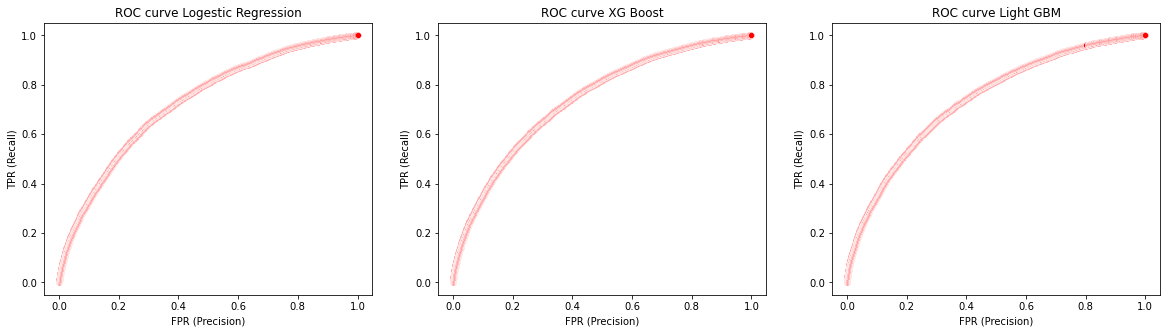

In [146]:
fpr1, tpr1, _ = roc_curve (y_test, y_prob1[:,1])
fpr2, tpr2, _ = roc_curve (y_test, y_prob2[:,1])
fpr3, tpr3, _ = roc_curve (y_test, y_prob3[:,1])


# title('XGBoost ROC curve'). # xlabel('FPR (Precision)'). # ylabel( 'TPR (Recall)')
fig,axes = plt.subplots(1,3,figsize = (20,5))
models = ["Logestic Regression","XG Boost","Light GBM"]
fpr = [fpr1,fpr2,fpr3]
tpr = [tpr1,tpr2,tpr3]

for i in range(3):
    plt.subplot(1,3,i+1)
    sns.scatterplot(fpr[i], tpr[i],color = 'r')
    plt.title("ROC curve {}".format(models[i]))
    plt.xlabel('FPR (Precision)')
    plt.ylabel('TPR (Recall)')
    print('Area under curve (AUC) of {}: {}'.format(models[i],auc(fpr[i], tpr[i])))
plt.show()
    
#print('Area under curve (AUC): ', auc(fpr, tpr))


In [149]:
print("LOGISTIC REGRESSION - STAGE 1")
print(metrics.classification_report(y_tests1,y_preds1))

print("LOGISTIC REGRESSION - STAGE 2")
print(metrics.classification_report(y_test,y_pred1))

print("XG BOOST")
print(metrics.classification_report(y_test,y_pred2))

print("LIGHT GBM")
print(metrics.classification_report(y_test,y_pred3))

LOGISTIC REGRESSION - STAGE 1
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2431
           1       0.00      0.00      0.00       150

    accuracy                           0.94      2581
   macro avg       0.47      0.50      0.49      2581
weighted avg       0.89      0.94      0.91      2581

LOGISTIC REGRESSION - STAGE 2
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     84880
           1       0.15      0.66      0.25      7373

    accuracy                           0.68     92253
   macro avg       0.56      0.67      0.52     92253
weighted avg       0.89      0.68      0.76     92253

XG BOOST
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84880
           1       0.16      0.65      0.26      7373

    accuracy                           0.70     92253
   macro avg       0.56      0.68      0.53     92253
weigh

# Scorecard Development: LGBM

In [150]:
y_prob = model3.predict_proba(X_test)
y_pred = model3.predict(X_test)

In [151]:
print(y_prob[:,0])

[0.49841427 0.80712105 0.40759611 ... 0.69300596 0.81865004 0.45984781]


In [152]:
X_test1 = X_test.copy()
X_test1['Default_prob'] = y_prob[:,0]

In [153]:
X_test1['predictions'] = y_pred

In [154]:
X_test1 = X_test1.reset_index()
X_test1.head()

,index,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_BIRTH,OCCUPATION_TYPE,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,CODE_GENDER,ORGANIZATION_TYPE,DAYS_ID_PUBLISH,...,FLAG_PHONE,FLAG_WORK_PHONE,FLAG_OWN_CAR,REGION_POPULATION_RELATIVE,HOUR_APPR_PROCESS_START,Flag_Documents,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,Default_prob,predictions
0,129837,0.886303,0.707723,0.825074,0.298082,0.498835,0.184792,0.253784,0.016931,0.458261,...,0.0,0.0,0.055054,0.087776,0.304348,3.0,0.0,0.048583,0.498414,1
1,295081,0.760812,0.757885,0.832992,-0.257508,0.998835,0.184792,-0.156449,0.016931,0.745937,...,1.0,1.0,-0.114634,0.491595,0.782609,3.0,0.0,0.005336,0.807121,0
2,52785,0.648936,0.123052,0.107712,-0.225002,0.702237,-0.407830,-0.156449,-0.404203,0.337384,...,0.0,0.0,0.055054,0.142153,0.521739,0.0,1.0,0.005336,0.407596,1
3,179486,0.791402,0.634265,0.578093,0.180642,0.590168,0.184792,-0.156449,0.148624,0.892220,...,0.0,1.0,0.055054,0.344429,0.521739,3.0,0.0,0.005336,0.648355,0
4,219172,0.778013,0.875618,0.130554,-0.225002,0.826654,-0.407830,-0.156449,-0.404203,0.353953,...,0.0,0.0,0.055054,0.157398,0.521739,3.0,0.0,0.014787,0.798790,0


In [155]:
ser = []
ser_1 = []
for i in range(X_test1.shape[0]):
    if 0<X_test1['Default_prob'][i]<=0.5:
        ser.append(300 + X_test1['Default_prob'][i]*329/0.5)
        ser_1.append('BAD')
    elif 0.5<X_test1['Default_prob'][i]<=0.63:
        ser.append(630 + (X_test1['Default_prob'][i]-0.5)*59/0.13)
        ser_1.append('FAIR')
    elif 0.63<X_test1['Default_prob'][i]<=0.69:
        ser.append(690 + (X_test1['Default_prob'][i]-0.63)*29/0.06)
        ser_1.append('GOOD')
    elif 0.69<X_test1['Default_prob'][i]<=1:
        ser.append(720 + (X_test1['Default_prob'][i]-0.69)*130/0.31)
        ser_1.append('EXCELLENT')
        

In [156]:
X_test1['SCORE'] = ser
X_test1['RATING'] = ser_1

In [157]:
X_test1.loc[:,['predictions','Default_prob','SCORE','RATING']]

,predictions,Default_prob,SCORE,RATING
0,1,0.498414,627.956588,BAD
1,0,0.807121,769.115278,EXCELLENT
2,1,0.407596,568.198237,BAD
3,0,0.648355,698.871810,GOOD
4,0,0.798790,765.621477,EXCELLENT
...,...,...,...,...
92248,1,0.287965,489.480960,BAD
92249,1,0.261494,472.063249,BAD
92250,0,0.693006,721.260562,EXCELLENT
92251,0,0.818650,773.950017,EXCELLENT


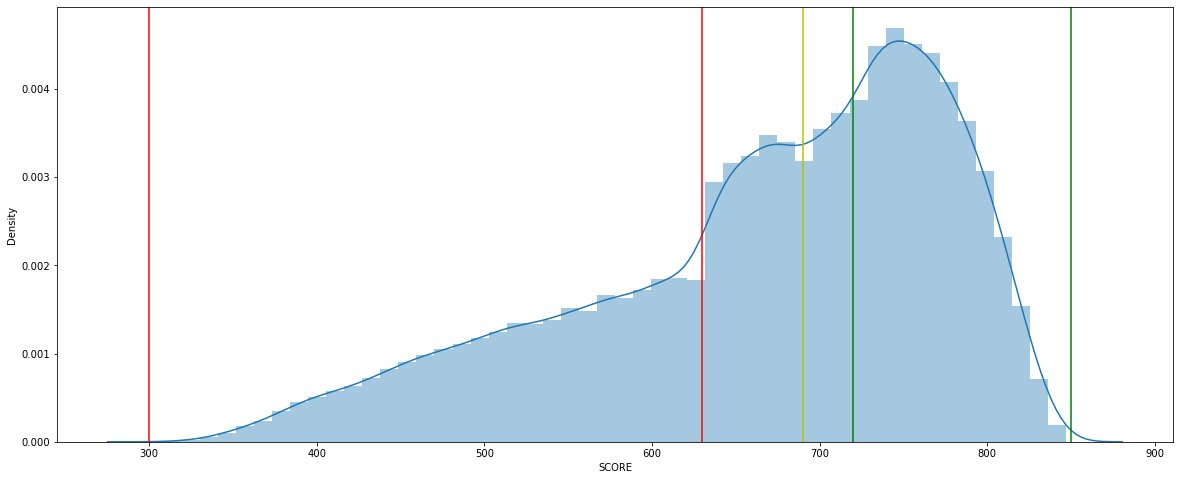

In [158]:
plt.figure(figsize = (20,8))
sns.distplot(X_test1['SCORE'])
plt.axvline(300,color = 'r')
plt.axvline(630,color = 'r')
plt.axvline(690,color = 'y')
plt.axvline(720,color = 'g')
plt.axvline(850,color = 'g')
plt.show()

## Conclusion :
The Score card is developed as above and based on f1 score we use should use Light GBm for prediction in Home Credit Default risk